In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
sns.set()

In [2]:
def makeTimestamp(x):
    return x.timestamp()

In [3]:
# Load in the counties 
can = pd.read_csv('Airport-Data/can.csv')
atlCounties = pd.read_csv('Airport-Data/atl.csv')
jfkCounties = pd.read_csv('Airport-Data/jfk.csv')
lgaCounties = pd.read_csv('Airport-Data/lga.csv')
seaCounties = pd.read_csv('Airport-Data/sea.csv')
laxCounties = pd.read_csv('Airport-Data/lax.csv')

# Load in original airport data
airports = pd.read_csv('Archieved-Data/airport_traffic_NA.csv', parse_dates = [1])

In [4]:
# Associate Canadian provinces with its respective airport records
listCanAirports = can["airport"].unique()
canAirports = airports[airports["AirportName"].isin(listCanAirports)]
canAirports = canAirports.sort_values(by = ['AirportName', 'Date'])

yvr = canAirports[canAirports["AirportName"] == "Vancouver International"].reset_index(drop = True)
yeg = canAirports[canAirports["AirportName"] == "Calgary International"].reset_index(drop = True)
yyz = canAirports[canAirports["AirportName"] == "Toronto Pearson"].reset_index(drop = True)
yul = canAirports[canAirports["AirportName"] == "Montreal Trudeau"].reset_index(drop = True)

#Repeat with the USA 
atl = airports[airports["State"] == "Georgia"]
atl = atl.sort_values(by = ['Date']).reset_index(drop = True)

jfk = airports[airports["AirportName"] == "John F. Kennedy International"]
jfk = jfk.sort_values(by = ['Date']).reset_index(drop = True)

lga = airports[airports["AirportName"] == "LaGuardia"]
lga = lga.sort_values(by = ['Date']).reset_index(drop = True)

sea = airports[airports["AirportName"] == "Seattle-Tacoma International"]
sea = sea.sort_values(by = ['Date']).reset_index(drop = True)

lax = airports[airports["AirportName"] == "Los Angeles International"]
lax = lax.sort_values(by = ['Date']).reset_index(drop = True)

# YVR (Trends in Airport Traffic)

In [5]:
yvr["timestamp"] = yvr["Date"].apply(makeTimestamp)
fit = stats.linregress(yvr["timestamp"], yvr["PercentOfBaseline"])
yvr["Prediction"] = yvr["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(3.638258576939155e-07, -503.8421055153643)

Text(0.5, 0, '')

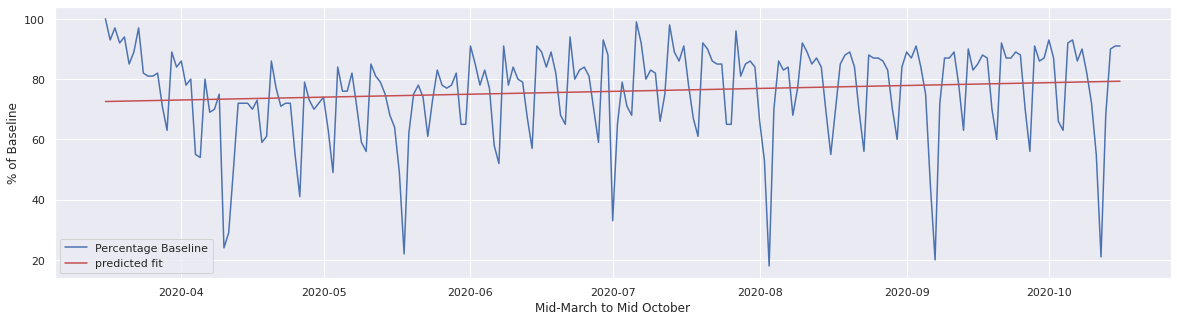

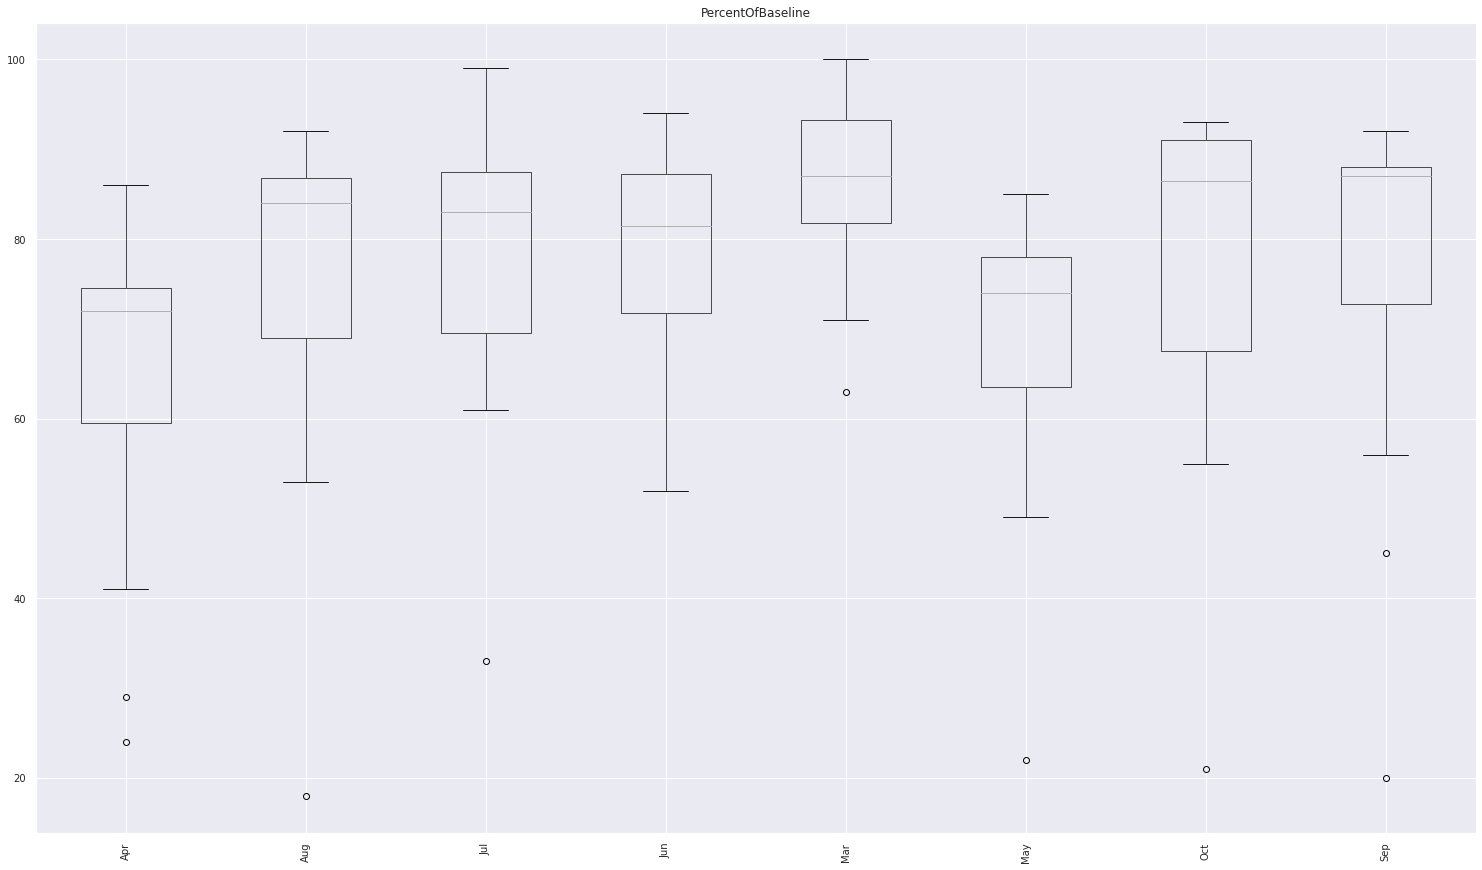

In [6]:
plt.figure(figsize = (20,5))
plt.plot(yvr["Date"], yvr['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(yvr["Date"], yvr["Prediction"], 'r-', label = 'predicted fit')
plt.xlabel("Mid-March to Mid October")
plt.ylabel("% of Baseline")
plt.legend()

yvr["Date"] = pd.to_datetime(yvr["Date"])
yvr.boxplot(column = ['PercentOfBaseline'], by = yvr['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")

In [7]:
# Looking for any correlation between percent of baseline in airport traffic & 
yvr["Month"] = yvr['Date'].dt.month_name()
yvr[yvr["Month"] == "April"]

,Unnamed: 0,Date,AirportName,PercentOfBaseline,City,State,Country,lat,long,timestamp,Prediction,Month
16,4063,2020-04-01,Vancouver International,86,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585699e+09,73.076266,April
17,4247,2020-04-02,Vancouver International,78,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585786e+09,73.107701,April
18,4218,2020-04-03,Vancouver International,80,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585872e+09,73.139135,April
19,4224,2020-04-04,Vancouver International,55,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585958e+09,73.170570,April
20,4194,2020-04-05,Vancouver International,54,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586045e+09,73.202004,April
21,4200,2020-04-06,Vancouver International,80,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586131e+09,73.233439,April
22,4148,2020-04-07,Vancouver International,69,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586218e+09,73.264873,April
23,4203,2020-04-08,Vancouver International,70,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586304e+09,73.296308,April
24,4067,2020-04-09,Vancouver International,75,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586390e+09,73.327742,April
25,4248,2020-04-10,Vancouver International,24,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586477e+09,73.359177,April


In [17]:
 yvr.to_csv('yvr4analyze_both.csv', index = False)

# YEG 

In [8]:
yeg["timestamp"] = yeg["Date"].apply(makeTimestamp)
fit = stats.linregress(yeg["timestamp"], yeg["PercentOfBaseline"])
yeg["Prediction"] = yeg["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(4.433383145893134e-07, -618.3943891334463)

Text(0.5, 0, '')

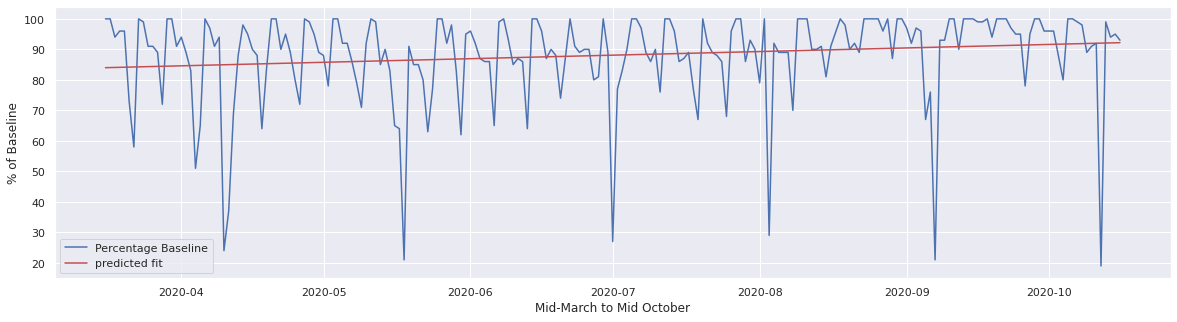

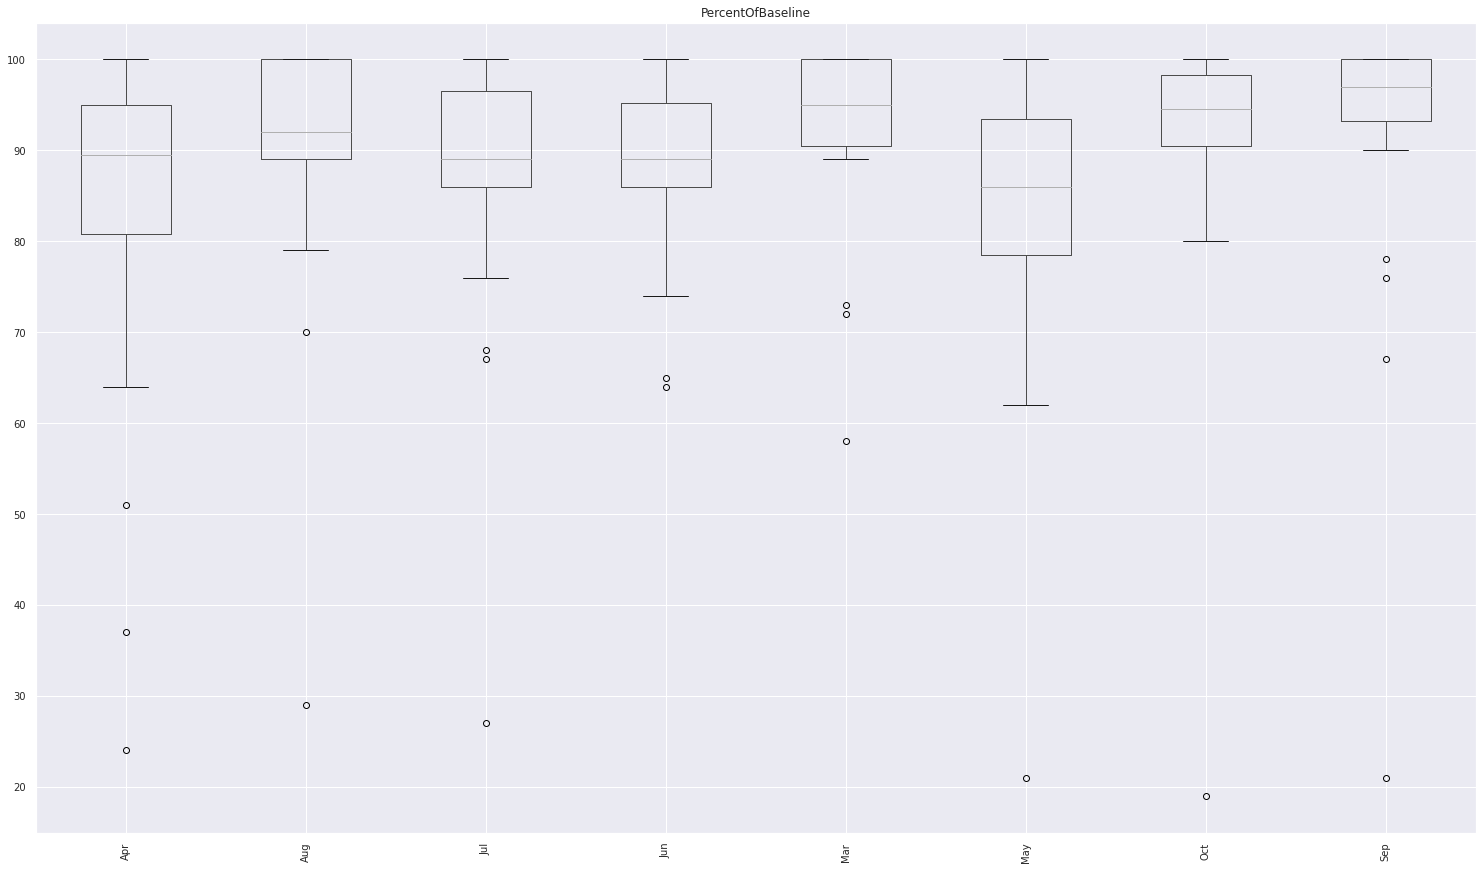

In [9]:
# Interesting occurance of oscillations; noting the significant dips in each month 
# (except for March and June) 
# June was a relatively good month for Alberta; stage 2 of relaunch & only 7 cases 
plt.figure(figsize = (20,5))
plt.plot(yeg["Date"], yeg['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(yeg["Date"], yeg["Prediction"], 'r-', label = 'predicted fit')
plt.xlabel("Mid-March to Mid October")
plt.ylabel("% of Baseline")
plt.legend()

# The mean for each month seem pretty high; not much fluctuation 
yeg["Date"] = pd.to_datetime(yeg["Date"])
yeg.boxplot(column = ['PercentOfBaseline'], by = yeg['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")

In [10]:
yeg["Month"] = yeg['Date'].dt.month_name()
yeg.to_csv('yeg4analyze_both.csv', index = False)
yeg.describe()

,Unnamed: 0,PercentOfBaseline,lat,long,timestamp,Prediction
count,214.000000,214.000000,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,3748.500000,88.084112,5.111848e+01,-1.140131e+02,1.593543e+09,88.084112
std,61.920648,15.335449,1.424417e-14,2.848835e-14,5.380265e+06,2.385277
min,3642.000000,19.000000,5.111848e+01,-1.140131e+02,1.584317e+09,83.993951
25%,3695.250000,86.000000,5.111848e+01,-1.140131e+02,1.588918e+09,86.033662
50%,3748.500000,91.500000,5.111848e+01,-1.140131e+02,1.593518e+09,88.073373
75%,3801.750000,99.000000,5.111848e+01,-1.140131e+02,1.598206e+09,90.151388
max,3855.000000,100.000000,5.111848e+01,-1.140131e+02,1.602806e+09,92.191099


In [1]:
# TODO produce csv files for YUL & YYG

# YUL

In [11]:
yul["timestamp"] = yul["Date"].apply(makeTimestamp)
fit = stats.linregress(yul["timestamp"], yul["PercentOfBaseline"])
yul["Prediction"] = yul["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(1.0257879169226946e-06, -1563.4934434543218)

Text(0.5, 0, '')

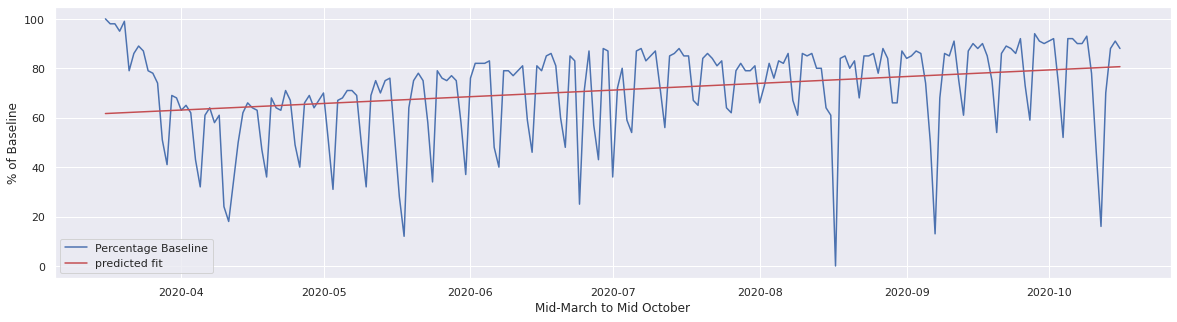

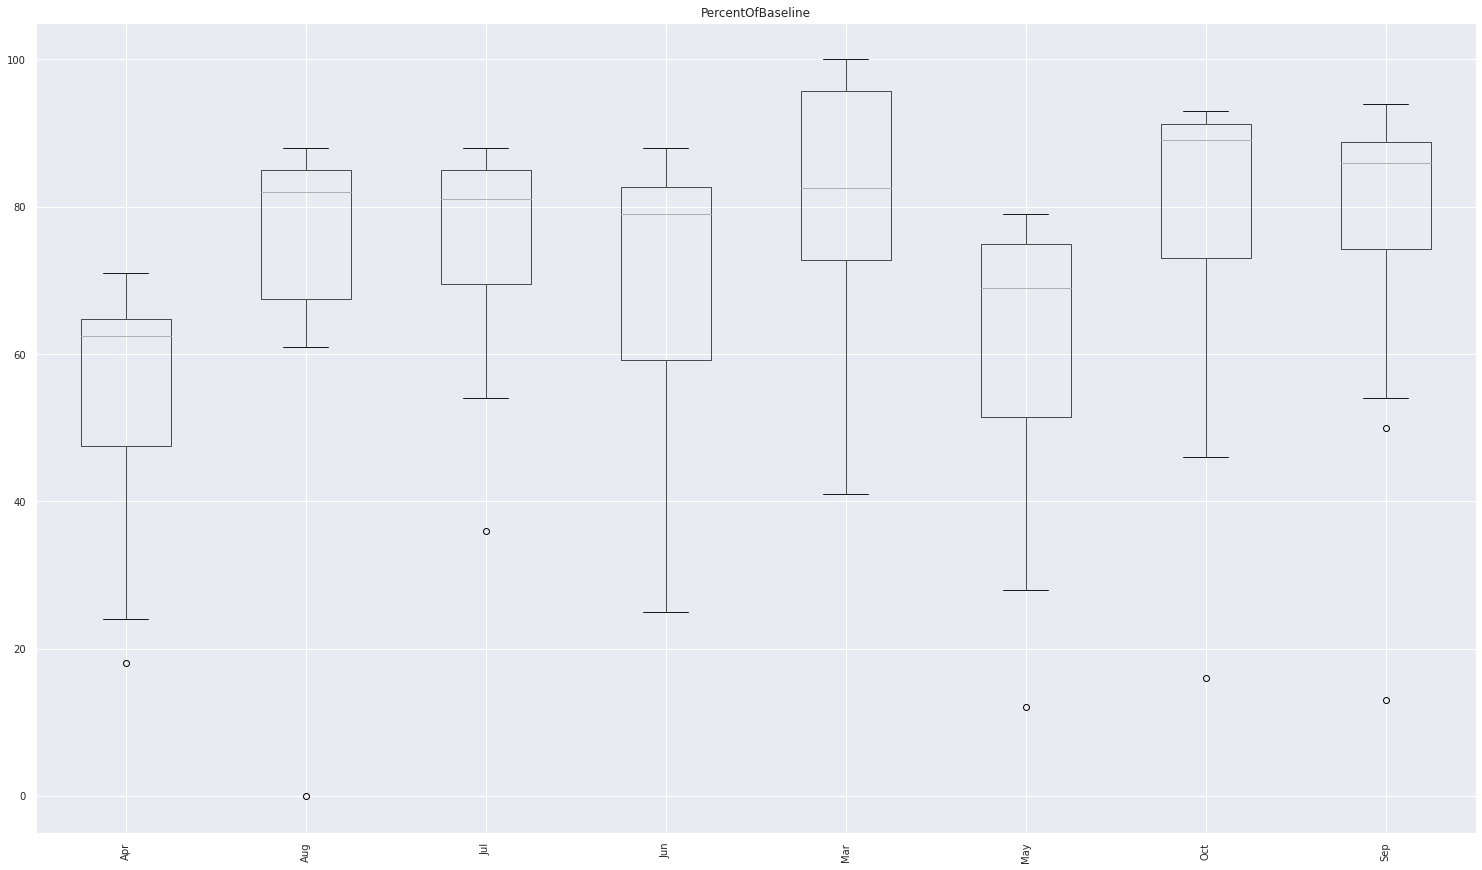

In [12]:
# Lots of oscillation; YUL is also considered as one of the major hubs
# Explainations for the dramatic dips? 
plt.figure(figsize = (20,5))
plt.plot(yul["Date"], yul['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(yul["Date"], yul["Prediction"], 'r-', label = 'predicted fit')
plt.xlabel("Mid-March to Mid October")
plt.ylabel("% of Baseline")
plt.legend()

# What happened in april? Initial shock/panic to declaration of emergency?
yul["Date"] = pd.to_datetime(yul["Date"])
yul.boxplot(column = ['PercentOfBaseline'], by = yul['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")

In [13]:
yul["Month"] = yul['Date'].dt.month_name()
#yul.to_csv('yul4analyze_both.csv', index = False)
yul.describe()

,Unnamed: 0,PercentOfBaseline,lat,long,timestamp,Prediction
count,215.000000,215.000000,2.150000e+02,2.150000e+02,2.150000e+02,215.000000
mean,5422.000000,71.162791,4.546784e+01,-7.374241e+01,1.593562e+09,71.162791
std,62.209324,18.561253,1.424402e-14,2.848804e-14,5.374886e+06,5.513493
min,5315.000000,0.000000,4.546784e+01,-7.374241e+01,1.584317e+09,61.679587
25%,5368.500000,63.000000,4.546784e+01,-7.374241e+01,1.588939e+09,66.421189
50%,5422.000000,76.000000,4.546784e+01,-7.374241e+01,1.593562e+09,71.162791
75%,5475.500000,85.000000,4.546784e+01,-7.374241e+01,1.598184e+09,75.904393
max,5529.000000,100.000000,4.546784e+01,-7.374241e+01,1.602806e+09,80.645995


## YYZ

In [14]:
yyz["timestamp"] = yyz["Date"].apply(makeTimestamp)
fit = stats.linregress(yyz["timestamp"], yyz["PercentOfBaseline"])
yyz["Prediction"] = yyz["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(6.583940552084329e-07, -993.1369344849836)

Text(0.5, 0, '')

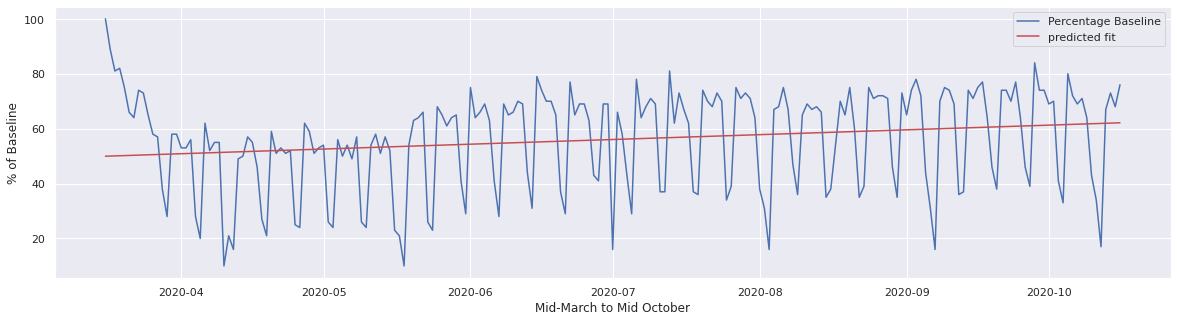

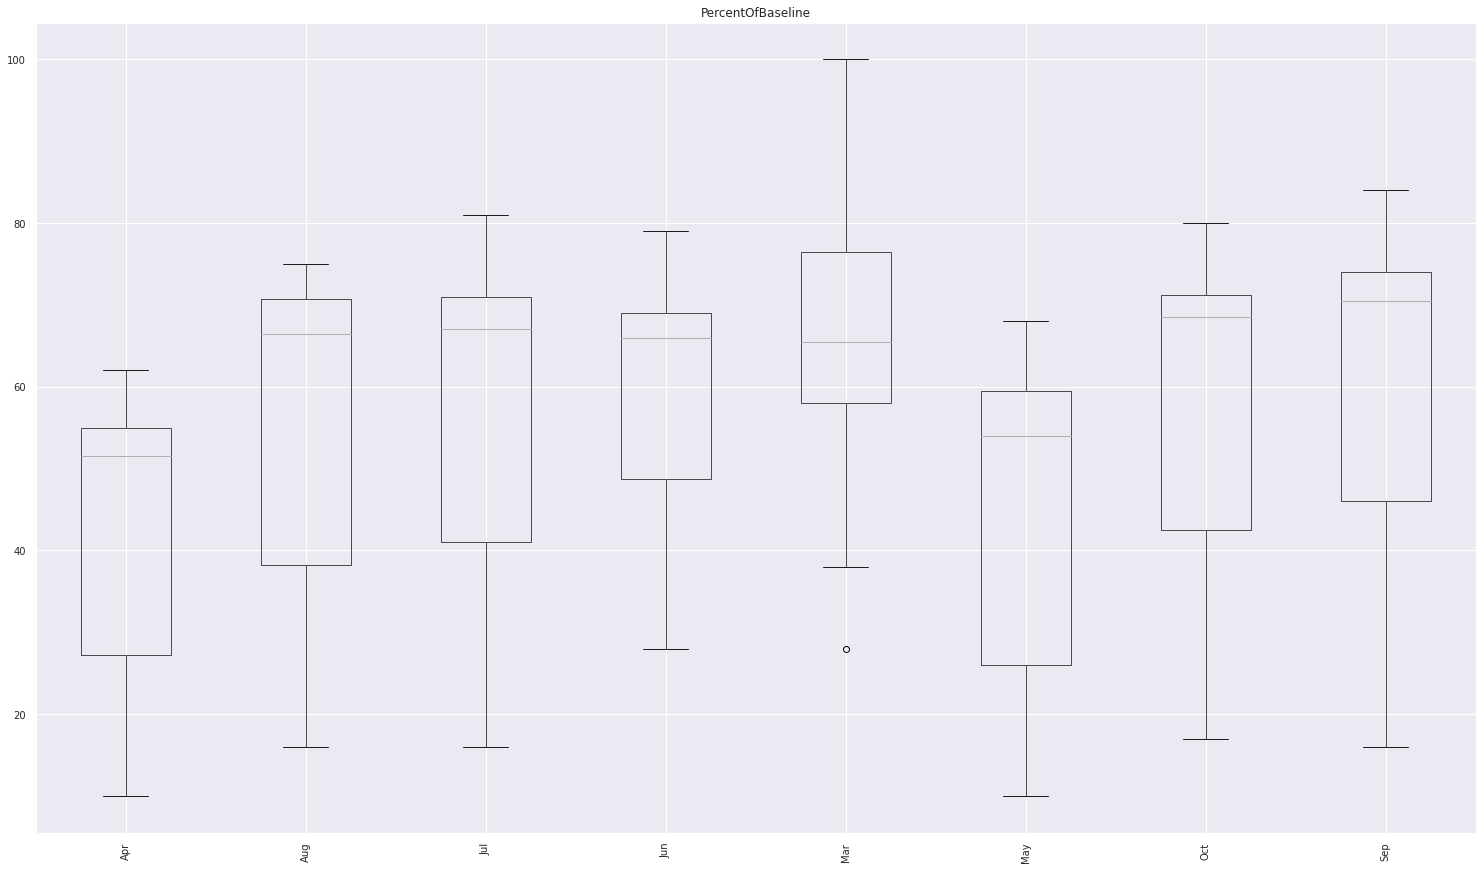

In [17]:
# Lots of oscillation; YYZ is also considered as one of the major hubs (after all, it is Toronto)
# Explainations for the dramatic dips? 
plt.figure(figsize = (20,5))
plt.plot(yyz["Date"], yyz['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(yyz["Date"], yyz["Prediction"], 'r-', label = 'predicted fit')
plt.xlabel("Mid-March to Mid October")
plt.ylabel("% of Baseline")
plt.legend()

# Maybe it was an initial shock/panic to declaration of emergency? 
# Toronto did impose very strict rules on lockdown, also Ontario gov't too (Doug Ford isn't all that trash)
yyz["Date"] = pd.to_datetime(yyz["Date"])
yyz.boxplot(column = ['PercentOfBaseline'], by = yyz['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")

In [16]:
yyz["Month"] = yyz['Date'].dt.month_name()
yyz.to_csv('yyz4analyze_both.csv', index = False)
yyz.describe()

,Unnamed: 0,PercentOfBaseline,lat,long,timestamp,Prediction
count,214.000000,214.000000,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,4784.500000,56.042056,4.367935e+01,-7.963134e+01,1.593543e+09,56.042056
std,61.920648,18.303470,7.122087e-15,1.424417e-14,5.380265e+06,3.542334
min,4678.000000,10.000000,4.367935e+01,-7.963134e+01,1.584317e+09,49.967828
25%,4731.250000,41.000000,4.367935e+01,-7.963134e+01,1.588918e+09,52.996968
50%,4784.500000,63.000000,4.367935e+01,-7.963134e+01,1.593518e+09,56.026107
75%,4837.750000,70.000000,4.367935e+01,-7.963134e+01,1.598206e+09,59.112132
max,4891.000000,100.000000,4.367935e+01,-7.963134e+01,1.602806e+09,62.141271
